<a href="https://colab.research.google.com/github/akshaytripathi09/Sleep-Disorder-Prediction/blob/main/SLEEP_DISORDER_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# upload datasets

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [ ]:
# DATA PRE-PROCESSING
# checking the issing values

df.isnull().sum()


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
#Replacing the null values with NONE in the column sleep disorder.
df['Sleep Disorder'].fillna('None', inplace=True)

In [ ]:
# Drop column Person ID
df.drop('Person ID', axis =1 , inplace= True)

In [ ]:
# Checking the number of unique values in each column
print("Unique values in each columns are")
for col in df.columns:
  print(col,df[col].nunique())

Unique values in each columns are
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [ ]:
# Split blood pressure into systolic & diastolic
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [ ]:
# replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
df.head()

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       42             6   Overweight          77   
1                       60             8       Normal          75   
2                       60             8       Normal          75   
3                       30             8        Obese          85   
4                       30             8        Obese          85   

   Daily Steps Sleep Disorder systolic_bp diastolic_bp  
0         4200           None         126           83  
1        10000           None         125           80  
2        10000           None         125           80  
3         3000    Sleep Apnea         140           90  
4         3000    Sleep Apnea         140           90

In [ ]:
# Checking the unique values in each categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category']. unique())
print('\n')
print(df['Sleep Disorder'].unique())


['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


<Axes: xlabel='Sleep Disorder', ylabel='count'>

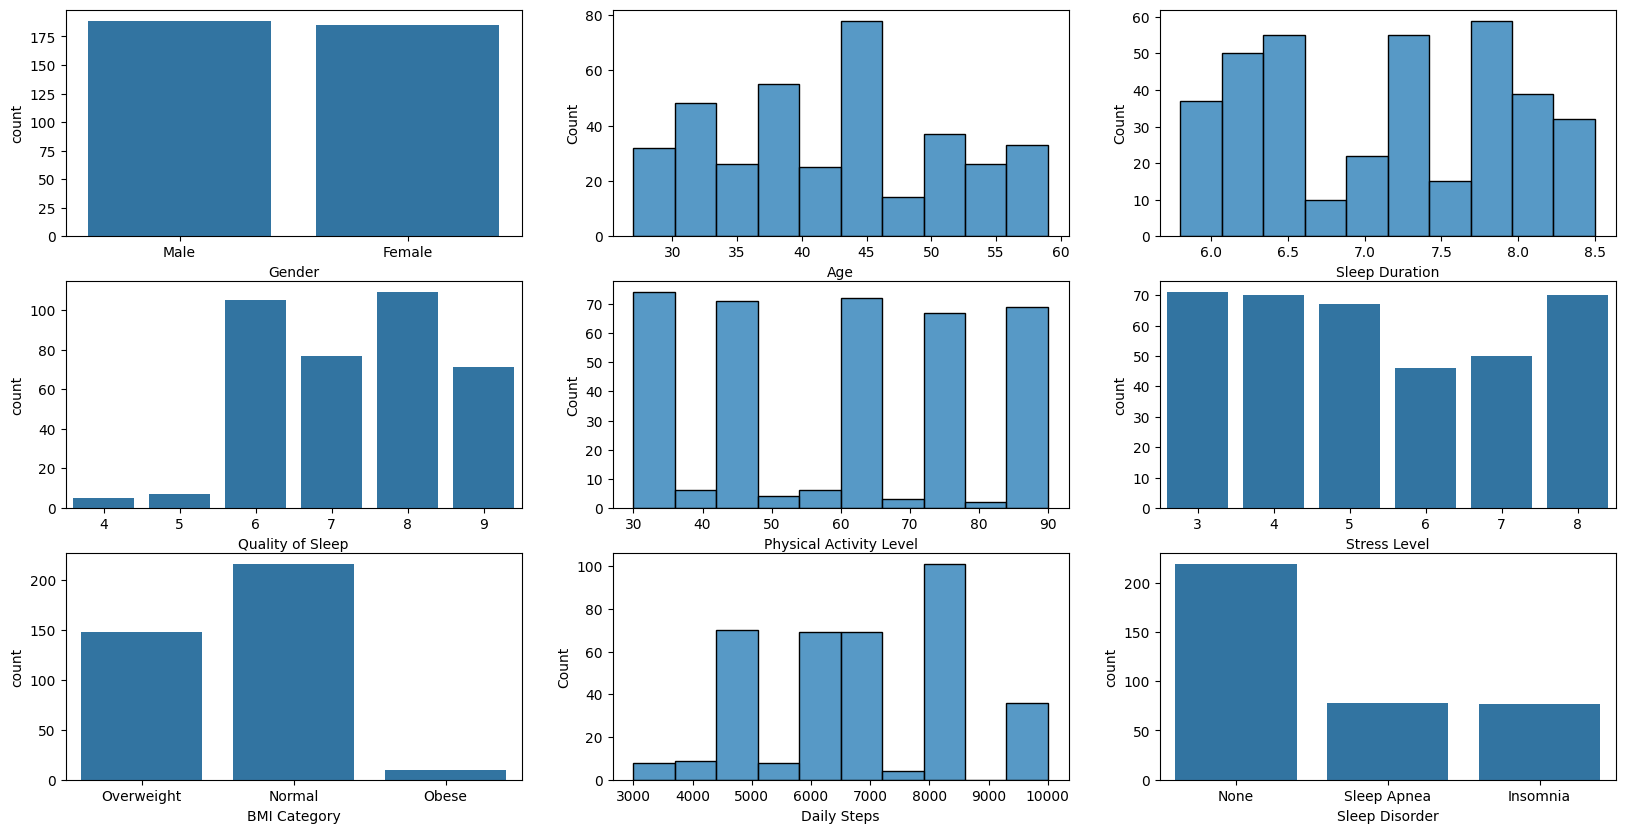

In [ ]:
# EXPLORATIVE DATA ANALYSIS
# PHASE 1 - UNDERSTANDING THE DATA BY PLOTTING ITS VARIABLES


fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])



Text(0.5, 1.0, 'Gender and Sleep Disorder')

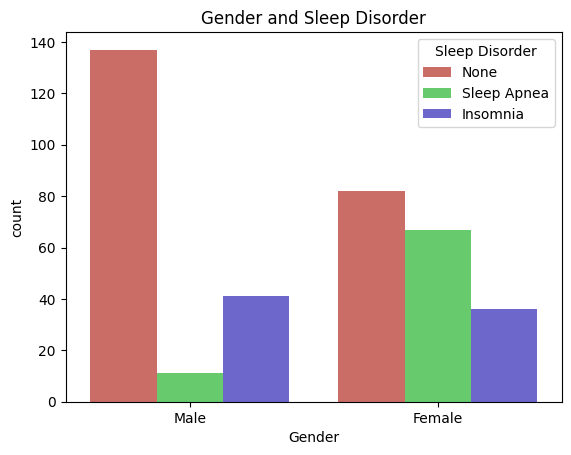

In [ ]:
# PHASE 2 - UNDERSTANDING THE CORELEATION B/W THE VARIABLES

# GENDER & SLEEP DISORDER

sns.countplot(x = 'Gender', data=df , palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')


<ipython-input-14-58b6c633ec38>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

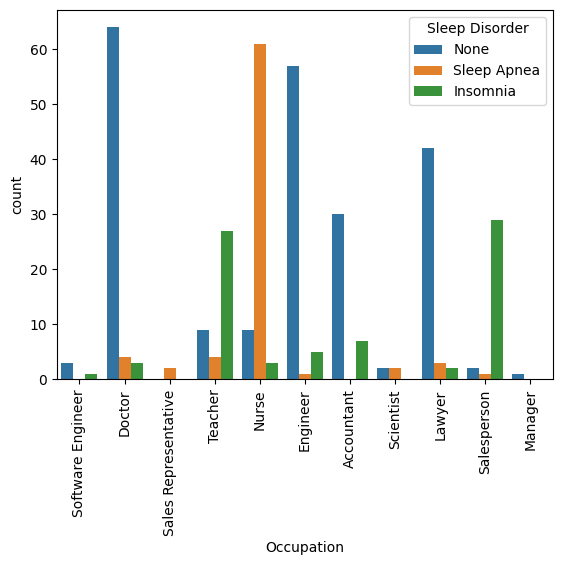

In [ ]:
# EFFECT OF OCCUPATION ON SLEEP
ax = sns.countplot(x ='Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


Text(0.5, 1.0, 'BMI Category & Sleep Disordeer')

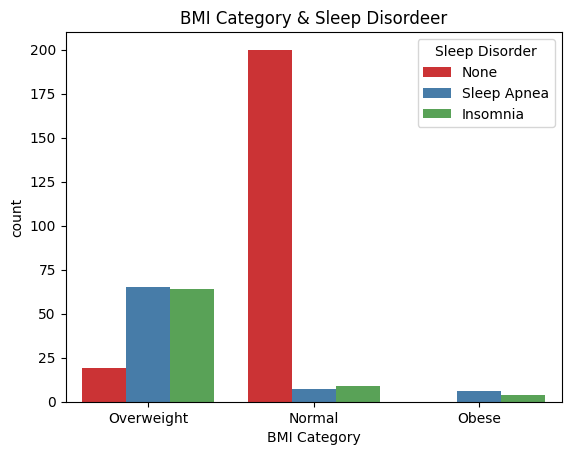

In [ ]:
# BMI AND SLEEP DISORDER
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category & Sleep Disordeer')

In [ ]:
# DATA PREPROCESSING PART 2
# LABEL ENCODING FOR CATEGORICAL VARIABLES

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
vars = ['Gender','Occupation','BMI Category','Sleep Disorder']
for i in vars:
  label_encoder.fit(df[i].unique())
  df[i]  = label_encoder.transform(df[i])
  print(i,':' , df[i].unique())


Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


<ipython-input-19-c7a21558e3c6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True , cmap = 'coolwarm')


<Axes: >

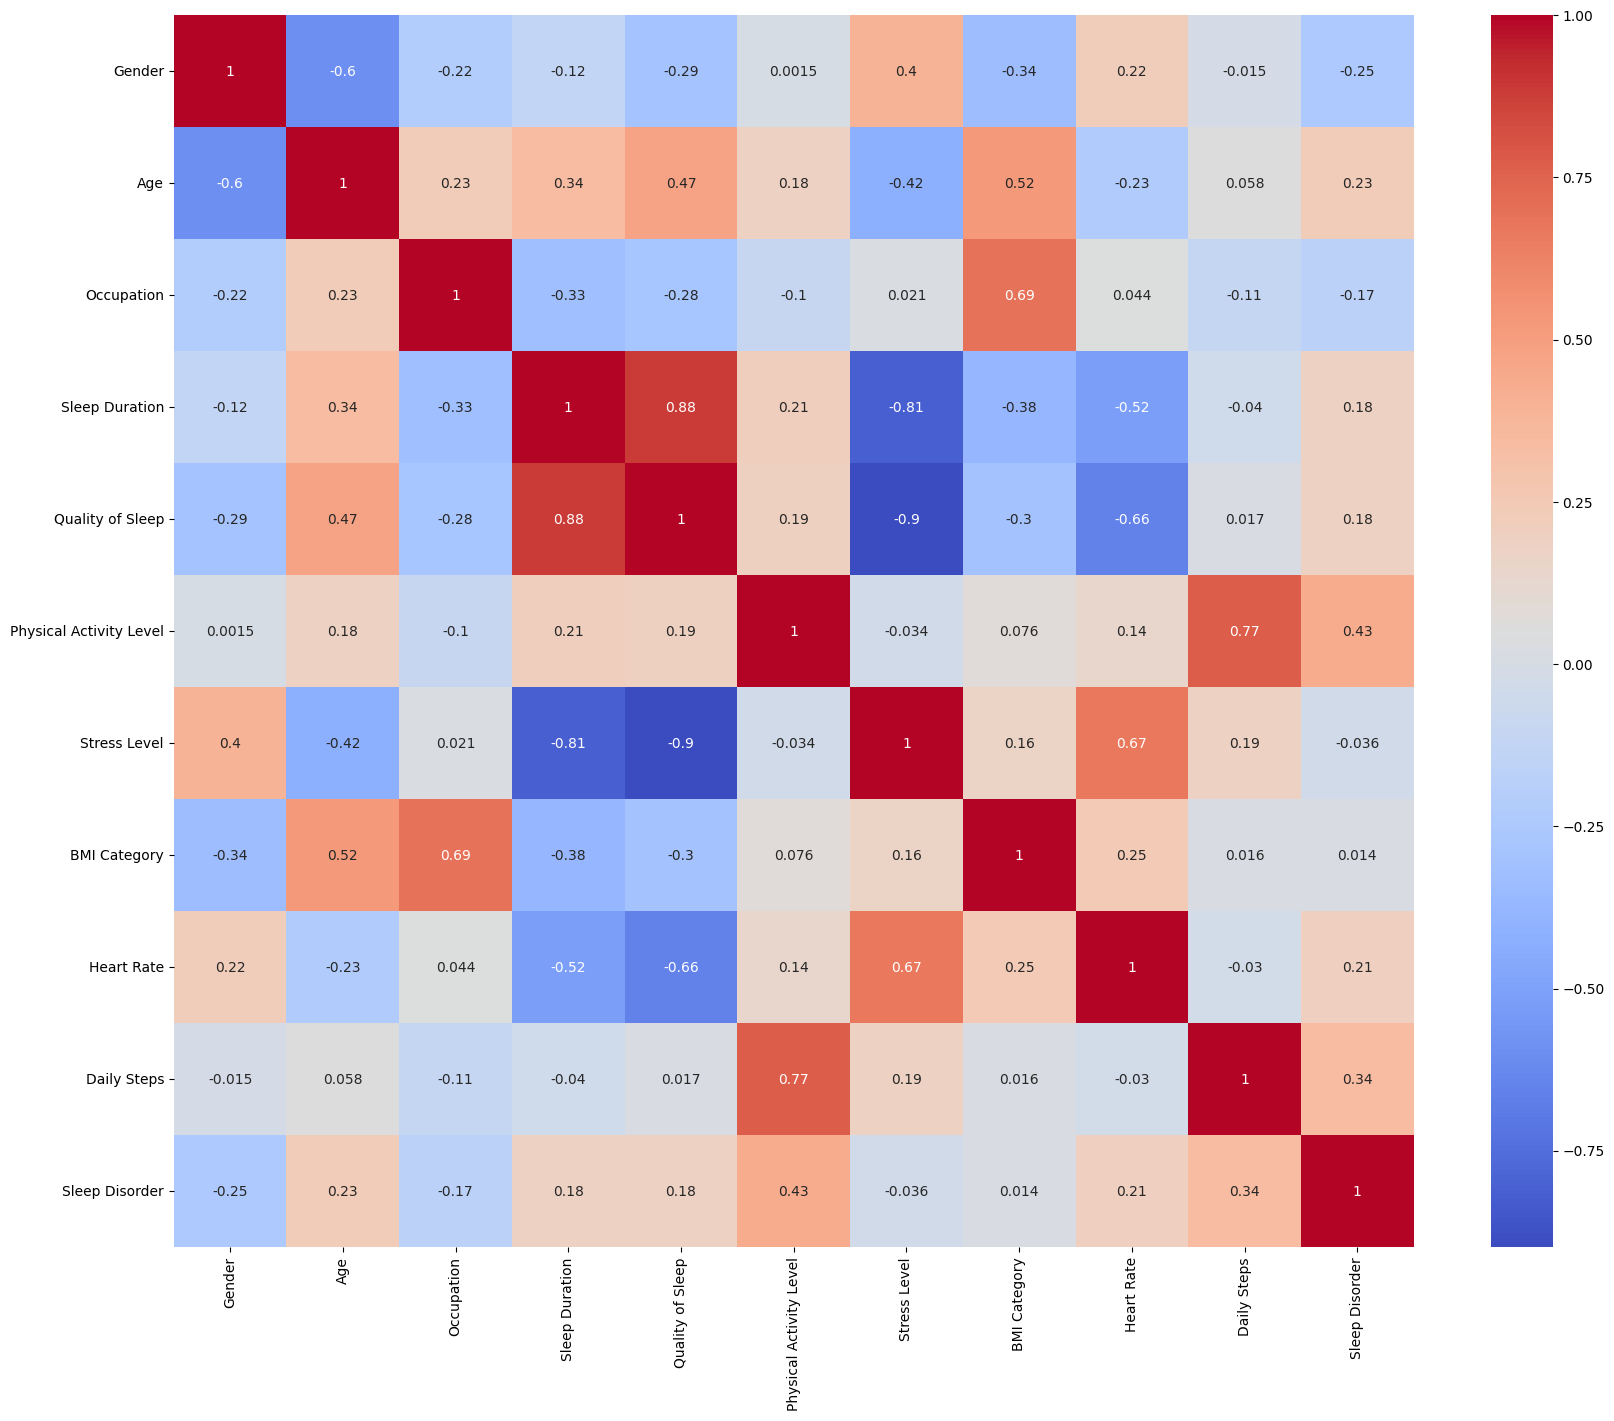

In [ ]:
# CORRELEATION MATRIX HEATMAP
plt.figure(figsize = (20,16))
sns.heatmap(df.corr(), annot = True , cmap = 'coolwarm')


In [ ]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis = 1),df['Sleep Disorder'], test_size =0.3, random_state = 42)

In [ ]:
X_train.head()

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
19        1   30           1             7.6                 7   
357       0   58           5             8.0                 9   
79        1   33           1             6.0                 6   
167       1   41           3             7.1                 7   
18        0   29           5             6.5                 5   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
19                        75             6             0          70   
357                       75             3             2          68   
79                        30             8             0          72   
167                       55             6             2          72   
18                        40             7             0          80   

     Daily Steps systolic_bp diastolic_bp  
19          8000         120           80  
357         7000         140           95  
79          5000         125           80  
167         6000         125           82  
18          4000         132           87

In [ ]:
# DATA NORMALIZATION

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [ ]:
# MODEL BUILDING (FOR PREDICTION OF SLEEP DISORDER THROUGH CLASSIFICATION ALGORITHMS WE WILL USE FOLLOWING ALGORITHMS)
# 1- DECISION TREE CLASSIFIER


from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train_scale, y_train)

DecisionTreeClassifier()

In [ ]:
# TRAINING ACURACY
print("Training Accuracy:", dtree.score(X_train_scale,y_train))

Training Accuracy: 0.9348659003831418


In [ ]:
# DECISION TREE MODEL EVALUATION
d_pred = dtree.predict(X_test_scale)
d_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 0])

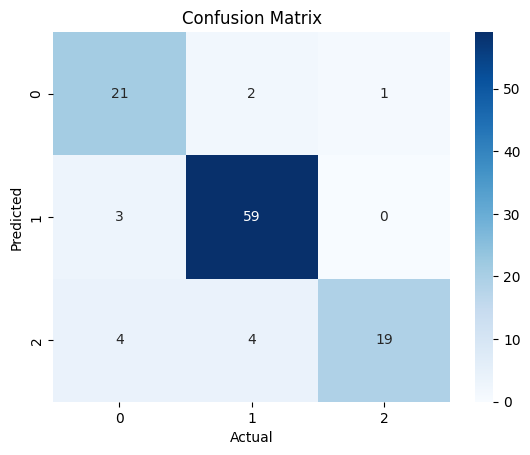

In [ ]:
# USING CONFUSION MATRIX HEATMAP TO VISUALIZE MODEL ACCURACY

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred),annot = True, cmap='Blues', fmt = 'g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<ipython-input-31-1a058dc184b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = 'r', label = "Actual Values")
<ipython-input-31-1a058dc184b9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_pred, hist = False , color= "b", label="Fitted va

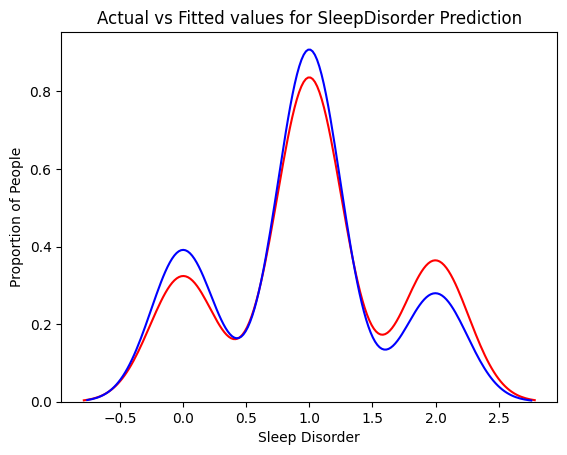

In [ ]:
# DISTRIBUTION PLOT FOR PREDICTED & ACTUAL VALUES
ax = sns.distplot(y_test, hist = False, color = 'r', label = "Actual Values")
sns.distplot(d_pred, hist = False , color= "b", label="Fitted values", ax=ax)
plt.title("Actual vs Fitted values for SleepDisorder Prediction")
plt.xlabel("Sleep Disorder")
plt.ylabel("Proportion of People")
plt.show()

In [ ]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, d_pred))
print("Accuracy:", accuracy_score(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.91      0.95      0.93        62
           2       0.95      0.70      0.81        27

    accuracy                           0.88       113
   macro avg       0.87      0.84      0.85       113
weighted avg       0.88      0.88      0.87       113

Accuracy: 0.8761061946902655


In [ ]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)


In [ ]:
# TRAINING THE MODEL WITH TRAIN DATASET
rfc.fit(X_train_scale, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# TRAINING ACURACY
print("Training accuracy:", rfc.score(X_train_scale,y_train))

Training accuracy: 0.9348659003831418


In [ ]:
# RANDOM FOREST CLASSIFIER EVALUATION
rfc_pred = rfc.predict(X_test_scale)
rfc_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 0])

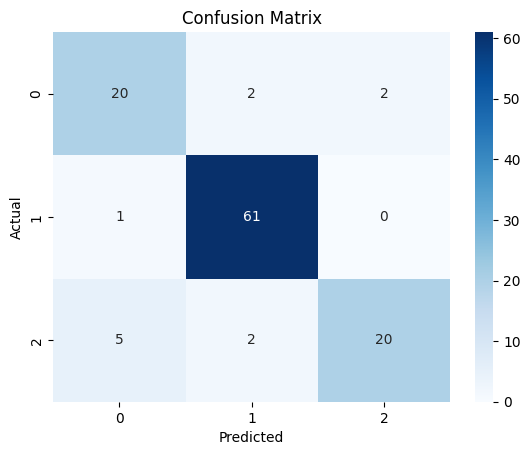

In [ ]:
# USING CONFUSION MATRIX HEATMAP
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, cmap= "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-42-8ea958df51f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-42-8ea958df51f4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" 

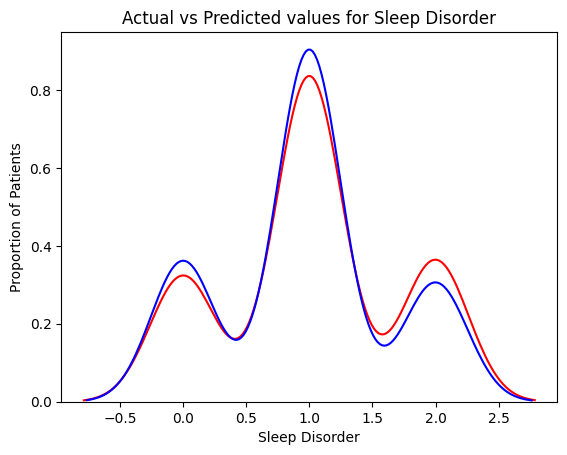

In [ ]:
# DISTRIBUTION PLOT FOR PREDICTED ACTUAL VALUES
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

In [ ]:
# CLASIFICATION REPORT
print(classification_report(y_test, rfc_pred))
print("Accuracy:", accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

Accuracy: 0.8938053097345132
